# cswEM branch
### task description
- architecture has a shared LSTM trunk and two readout softmax layers: context and nodes
- on begin trials (node 0) the network only gets feedback on context readout
- on every other trial (except for begin trial) network only gets feedback on node redout; this is the usual prediction task
- the idea is to test an EM architecture which 
    - has two memory slots which get written to according to activation on context readout
    - cell_state used to respond at begin trial is encoded to each slot proportional to context readout
    - memory is injected at each time step according to softmax readout
- one important difference between this setup and previous csw tasks is that the network is not given a context flag as an input, but it does receive feedback based on whether it correctly guesses the latent context it is in, which it can do based on transitions. the idea is to vary prshift and take a look at how fast it take the network to detect (according to its context readout) that it is in one environment or the other. 

In [137]:
import numpy as np
import itertools
from glob import glob as glob

from cswsims import *
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


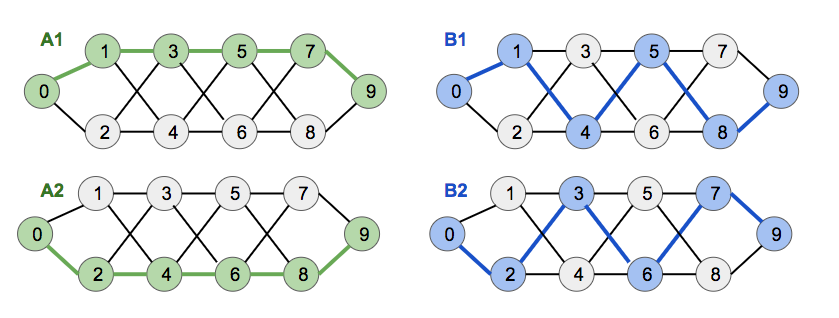

In [299]:
net = CSWNet(20)
trainer = Trainer(net,0.5,1)

train_data = trainer.train_loop(10000)

initializing sub01
0.0
5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.0
60.0
65.0
70.0
75.0
80.0
85.0
90.0
95.0


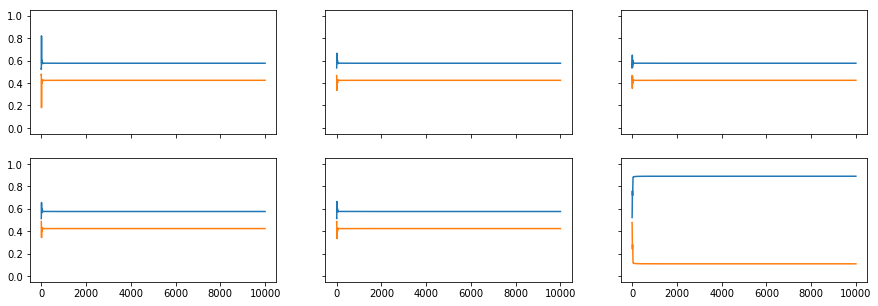

In [298]:
fig,axarr = plt.subplots(2,3,figsize=(15,5),sharex=True,sharey=True);axarr=axarr.reshape(-1)

for i in range(6):
  ax = axarr[i]
  ax.set_ylim(-.05,1.05)
  ax.plot(train_data['ycontext_sm'][:,i,:])


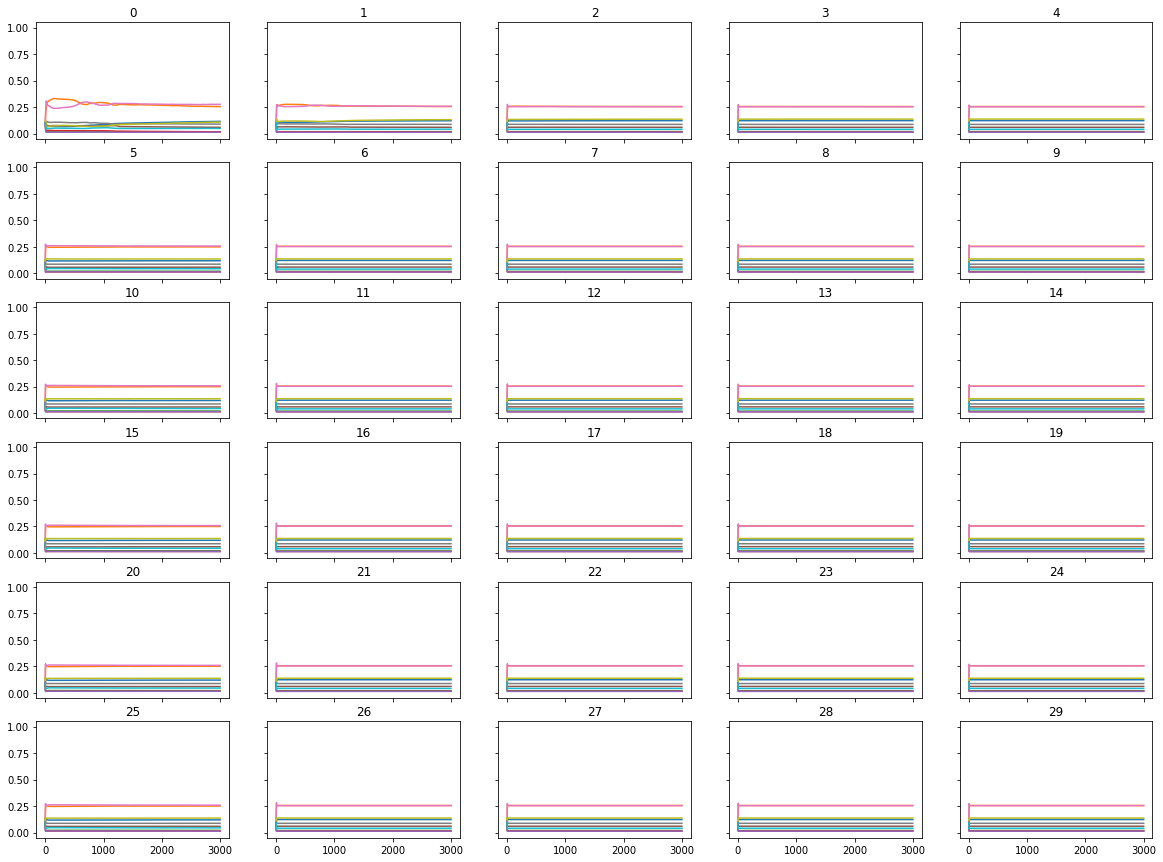

In [275]:
fig,axarr = plt.subplots(6,5,figsize=(20,15),sharey=True,sharex=True); axarr=axarr.reshape(-1)
for i in range(30):
  ax = axarr[i]
  ax.set_ylim(-.05,1.05)
  ax.set_title(i)
  ax.plot(train_data['ynode_sm'][:,i,:])

In [286]:
depth = 6*7
tstep_idx_context = np.arange(0,depth,7)
tstep_idx_node = np.delete(np.arange(depth),tstep_idx_context)

In [266]:
task = CSWTask(1)
pathL,graphidL = task.gen_pathL(2,1)
X,Y = task.dataset_kstories(pathL,graphidL)
for x,y in zip(X.squeeze(),Y.squeeze()):
  print(x,y)

0 1
2 3
3 6
6 7
7 9
9 0
0 0
2 4
4 6
6 8
8 9
9 0
